In [1]:
import polars as pl

## Why Polars?

- It's very fast -- possibly the fastest dataframe library out there as of 2022.
- Automatic parallelization, making use of all CPUs available without a fuss. Makes use of Single Instruction Multiple Data to make the most of modern CPU architectures and RAM availability.
- Better memory management than pandas -- no unnecessary copying of data.
- Both eager (for exploration) and lazy (for efficient) execution modes. Lazy execution gives automatic optimization of a query -- state **what** you want to do, not how.
- Apache Arrow Columnar Format under the hood enables Polars to talk to various other services more easily that also use Apache Arrow, as well as clever cache handling for increased performance and proper missing data handling (no more float casting for missing integers).

## Getting started

### Eager execution

In [2]:
df = pl.read_csv("https://j.mp/iriscsv")
print(df.filter(pl.col("sepal_length") > 5)
      .groupby("species")
      .agg(pl.all().sum())
)

shape: (3, 5)
┌────────────┬──────────────┬─────────────┬──────────────┬─────────────┐
│ species    ┆ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width │
│ ---        ┆ ---          ┆ ---         ┆ ---          ┆ ---         │
│ str        ┆ f64          ┆ f64         ┆ f64          ┆ f64         │
╞════════════╪══════════════╪═════════════╪══════════════╪═════════════╡
│ virginica  ┆ 324.5        ┆ 146.2       ┆ 273.1        ┆ 99.6        │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ versicolor ┆ 281.9        ┆ 131.8       ┆ 202.9        ┆ 63.3        │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ setosa     ┆ 116.9        ┆ 81.7        ┆ 33.2         ┆ 6.1         │
└────────────┴──────────────┴─────────────┴──────────────┴─────────────┘


### Lazy execution

Lazy execution means that Polars is given access to the entire context of the query, and can therefore plan/optimize the algorithm to perform the end-to-end task. Use `.lazy()` and `.collect()` to make a lazy query.

In [3]:
print(
    pl.read_csv("https://j.mp/iriscsv")
    .lazy()
    .filter(pl.col("sepal_length") > 5)
    .groupby("species")
    .agg(pl.all().sum())
    .collect()
)

shape: (3, 5)
┌────────────┬──────────────┬─────────────┬──────────────┬─────────────┐
│ species    ┆ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width │
│ ---        ┆ ---          ┆ ---         ┆ ---          ┆ ---         │
│ str        ┆ f64          ┆ f64         ┆ f64          ┆ f64         │
╞════════════╪══════════════╪═════════════╪══════════════╪═════════════╡
│ versicolor ┆ 281.9        ┆ 131.8       ┆ 202.9        ┆ 63.3        │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ virginica  ┆ 324.5        ┆ 146.2       ┆ 273.1        ┆ 99.6        │
├╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ setosa     ┆ 116.9        ┆ 81.7        ┆ 33.2         ┆ 6.1         │
└────────────┴──────────────┴─────────────┴──────────────┴─────────────┘


We can see an optimized computational graph of the plan

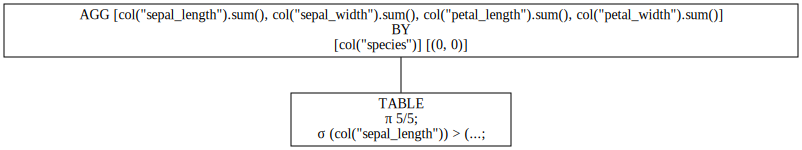

In [6]:
(pl.read_csv("https://j.mp/iriscsv")
    .lazy()
    .filter(pl.col("sepal_length") > 5)
    .groupby("species")
    .agg(pl.all().sum())).show_graph()